In [46]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

# preprocessing and resampling
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

# ML model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import sklearn
from distfit import distfit

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from imblearn.combine import SMOTETomek 
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import MinMaxScaler

from imblearn.pipeline import Pipeline as imbpipeline

from imblearn.combine import SMOTEENN

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer


np.warnings.filterwarnings('ignore')

In [47]:
#Load Dataset
df = pd.read_csv("C:/Users/User/Desktop/Faillite/data/data.csv")
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [48]:
# drop the space before title of columns
df.columns = [c.replace(" ","", 1) if c.startswith(' ') else c for c in df.columns]

In [ ]:
#supression 2 colonnes 
#Spliting data
#Supression outliers  
#itération 1: pipe / standard scaling / lazyregressor / matrice de confusion/ classification report 
#itération 2: ...MinMax, logistic regression ...
#Processing distribution et choix du style de scaling 
#Itération 3: pipe/ scaling suivant distribution/ ALgo/ matrice de confusion / Classification report/ leargning curve
#Algo: DEcsion TRee / Randomforest classifier / KNN classifier  / SVD / boosting / stacking 
#Feature selection, corr, feature importance, 
#Grid Search : smote / param

In [49]:
#Suppression colonnes 
df = df.drop(['Net Income Flag', "Liability-Assets Flag"], axis = 1)

In [34]:
#Supression des Outliers  

In [50]:
bank_data = df.copy()

In [51]:
# Outliers removal

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
     
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in bank_data:
    new_df = outliers_removal(bank_data[col],str(col),bank_data)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
Bankrupt? Lower: 0.0
Bankrupt? Upper: 0.0
Bankrupt? outliers for close to bankruptcy cases: 220
-----------------------------------------------------------------
Quartile 25: 0.476527080388047 | Quartile 75: 0.535562813825379
iqr: 0.05903573343733198
Cut Off: 0.08855360015599797
ROA(C) before interest and depreciation before interest Lower: 0.38797348023204903
ROA(C) before interest and depreciation before interest Upper: 0.624116413981377
ROA(C) before interest and depreciation before interest outliers for close to bankruptcy cases: 391
-----------------------------------------------------------------
Quartile 25: 0.53554295682512 | Quartile 75: 0.58915721761884
iqr: 0.05361426079372
Cut Off: 0.08042139119058
ROA(A) before interest and % after tax Lower: 0.45512156563454
ROA(A) before interest and % after tax Upper: 0.66957860880942
ROA(A) before interest and % after tax outliers for close to bankruptcy cases: 561
-------------

-----------------------------------------------------------------
Quartile 25: 0.263758926420651 | Quartile 75: 0.264388341065032
iqr: 0.0006294146443809878
Cut Off: 0.0009441219665714817
Total Asset Return Growth Rate Ratio Lower: 0.26281480445407956
Total Asset Return Growth Rate Ratio Upper: 0.2653324630316035
Total Asset Return Growth Rate Ratio outliers for close to bankruptcy cases: 674
-----------------------------------------------------------------
Quartile 25: 0.37474851905666695 | Quartile 75: 0.386731120301032
iqr: 0.011982601244365065
Cut Off: 0.017973901866547598
Cash Reinvestment % Lower: 0.3567746171901194
Cash Reinvestment % Upper: 0.40470502216757964
Cash Reinvestment % outliers for close to bankruptcy cases: 617
-----------------------------------------------------------------
Quartile 25: 0.00755504663011965 | Quartile 75: 0.0162695280201934
iqr: 0.00871448139007375
Cut Off: 0.013071722085110626
Current Ratio Lower: -0.005516675454990976
Current Ratio Upper: 0.02934

Quartile 25: 0.34102297735578047 | Quartile 75: 0.3609148870133705
iqr: 0.019891909657590023
Cut Off: 0.029837864486385035
Operating Funds to Liability Lower: 0.31118511286939543
Operating Funds to Liability Upper: 0.3907527514997555
Operating Funds to Liability outliers for close to bankruptcy cases: 657
-----------------------------------------------------------------
Quartile 25: 0.2770339694810945 | Quartile 75: 0.2774287054274715
iqr: 0.0003947359463770117
Cut Off: 0.0005921039195655176
Inventory/Working Capital Lower: 0.27644186556152894
Inventory/Working Capital Upper: 0.278020809347037
Inventory/Working Capital outliers for close to bankruptcy cases: 944
-----------------------------------------------------------------
Quartile 25: 0.0031631476746991002 | Quartile 75: 0.011146766748190151
iqr: 0.007983619073491051
Cut Off: 0.011975428610236576
Inventory/Current Liability Lower: -0.008812280935537476
Inventory/Current Liability Upper: 0.023122195358426727
Inventory/Current Liabi

-----------------------------------------------------------------
Quartile 25: 0.018033665707965 | Quartile 75: 0.0383746158541899
iqr: 0.0203409501462249
Cut Off: 0.03051142521933735
Current Liability to Current Assets Lower: -0.012477759511372349
Current Liability to Current Assets Upper: 0.06888604107352725
Current Liability to Current Assets outliers for close to bankruptcy cases: 276
-----------------------------------------------------------------
Quartile 25: 0.7967498491931705 | Quartile 75: 0.8264545295408715
iqr: 0.029704680347701018
Cut Off: 0.04455702052155153
Net Income to Total Assets Lower: 0.752192828671619
Net Income to Total Assets Upper: 0.871011550062423
Net Income to Total Assets outliers for close to bankruptcy cases: 561
-----------------------------------------------------------------
Quartile 25: 0.0009036204813306 | Quartile 75: 0.0052697768568805
iqr: 0.0043661563755499
Cut Off: 0.00654923456332485
Total assets to GNP price Lower: -0.005645614081994249
Total 

In [52]:
new_df.shape

(6270, 94)

In [54]:
df.shape

(6819, 94)

In [ ]:
# Apres supression des outliers, nous avons perdu 559 rows 

In [ ]:
#Split de la data 

In [23]:
df_model = new_df.copy()

In [55]:
#On définit les features et la Target
X = df_model.drop(['Bankrupt?'], axis = 1)
y = df_model['Bankrupt?']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [56]:
X_train.shape

(4389, 93)

In [57]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
     acc = round(accuracy_score(y, y_pred), 2)
     cm = confusion_matrix(y, y_pred)
     sns.heatmap(cm, annot=True, fmt=".0f")
     plt.xlabel('y_pred')
     plt.ylabel('y')
     plt.title('Accuracy Score: {0}'.format(acc), size=10)
     plt.show()

In [58]:
target_names = ['class 0', 'class 1']

# BaseLine model, StandardScale + MinMax +Smote +  logisticRegression

In [ ]:
#identifier les features avec distribution normale 
# Features avec distribution normal = StandardSale
# Le reste des features = MinMaxScale

In [59]:
#Check_distribution
def check_normal (X):
    data = []
    
    for i in X.columns:
        if X[i].skew() > -0.5 and X[i].skew() <0.5:
            data.append(i)
    return data

In [15]:
check_normal (df)

['ROA(C) before interest and depreciation before interest',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Assets/Total Assets',
 'Cash Flow to Total Assets',
 'CFO to Assets']

In [ ]:
# Les features avec distribution normale sont les suivantes : 
# 'ROA(C) before interest and depreciation before interest',
#  'Working Capital to Total Assets',
#  'Quick Assets/Total Assets',
#  'Current Assets/Total Assets',
#  'Cash Flow to Total Assets',
#  'CFO to Assets'

In [66]:
normal_dis = X_train[['ROA(C) before interest and depreciation before interest',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Assets/Total Assets',
 'Cash Flow to Total Assets',
 'CFO to Assets']]
autre_dis = X_train.drop(['ROA(C) before interest and depreciation before interest',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Assets/Total Assets',
 'Cash Flow to Total Assets',
 'CFO to Assets'], axis = 1)


norm_trans = Pipeline(steps=[
    ('normal', StandardScaler()),
])
pas_norm_trans = Pipeline(steps=[
   ('Minmax',MinMaxScaler())])


preprocessing = ColumnTransformer([
        ('autre', pas_norm_trans, autre_dis.columns),
        ('normal', norm_trans, normal_dis.columns)
    ]
)

In [68]:
pipeline_logi = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', LogisticRegression()]])


# target_names= []

# target_names = ['class 0', 'class 1']
# pipeline_logi.fit(X_train, y_train)
# scores = cross_val_score ( estimator=pipeline_logi,
#                           X = X_train,
#                           y = y_train,
#                           cv=5,
#                           n_jobs = 2)
# y_pred_logi = pipeline_logi.predict (X_test)
# print ( 'Accuracy train: %.3f' %pipeline_logi.score (X_train, y_train) )
# print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
# print ( 'Accuracy test: %.3f' %pipeline_logi.score (X_test, y_test) )
# print(classification_report(y_test, y_pred_logi, target_names=target_names))

In [ ]:
#l'objectif de ce projet est de permettre à un investisseur de ne pas se tromper et investir dans une entreprise qui risque 
#de faire failite. Pour éliminer le risque, je vais me focaliser sur la metric "Recall" qui me va permettre de pas laisser passer
#d'entreprises qui vont faire faillite 
# Le Knn donne un très bon score pour le "Recall"

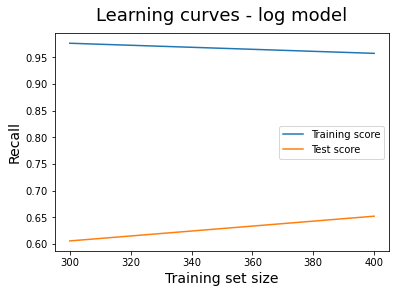

In [69]:
train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline_logi,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,400],
                                          cv = 5,
                                          scoring='recall',
                                          shuffle = True,
                                          random_state=3)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()


# 1ère itération, StandardScale + MinMax +Smote + KNeighborsClassifier¶

In [17]:
pipeline_knn = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', KNeighborsClassifier()]])


#target_names= []

target_names = ['class 0', 'class 1']
pipeline_knn.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_knn,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_knn = pipeline_knn.predict (X_test)
print ( 'Accuracy train: %.3f' %pipeline_knn.score (X_train, y_train) )
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_knn.score (X_test, y_test) )
print(classification_report(y_test, y_pred_knn, target_names=target_names))

Accuracy train: 0.918
Accuracy cross-validation: 0.870
Accuracy test: 0.876
              precision    recall  f1-score   support

     class 0       0.98      0.89      0.93      1814
     class 1       0.17      0.61      0.26        67

    accuracy                           0.88      1881
   macro avg       0.57      0.75      0.60      1881
weighted avg       0.95      0.88      0.91      1881



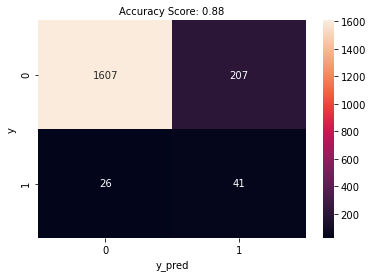

In [18]:
plot_confusion_matrix(y_test, y_pred_knn)

# 2ème itération, StandardScale + MinMax +Smote + DecisionTree

In [19]:
normal_dis = X_train[['ROA(C) before interest and depreciation before interest',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Assets/Total Assets',
 'Cash Flow to Total Assets',
 'CFO to Assets']]
autre_dis = X_train.drop(['ROA(C) before interest and depreciation before interest',
 'Working Capital to Total Assets',
 'Quick Assets/Total Assets',
 'Current Assets/Total Assets',
 'Cash Flow to Total Assets',
 'CFO to Assets'], axis = 1)


norm_trans = Pipeline(steps=[
    ('normal', StandardScaler()),
])
pas_norm_trans = Pipeline(steps=[
   ('Minmax',MinMaxScaler())])


preprocessing = ColumnTransformer([
        ('autre', pas_norm_trans, autre_dis.columns),
        ('normal', norm_trans, normal_dis.columns)
    ]
)

In [222]:
pipeline_dtc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', DecisionTreeClassifier()]])


#target_names= []

target_names = ['class 0', 'class 1']
pipeline_dtc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_dtc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_dtc = pipeline_dtc.predict (X_test)
print ( 'Accuracy train: %.3f' %pipeline_dtc.score (X_train, y_train) )
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_dtc.score (X_test, y_test) )
print(classification_report(y_test, y_pred_dtc, target_names=target_names))

Accuracy train: 1.000
Accuracy cross-validation: 0.930
Accuracy test: 0.928
              precision    recall  f1-score   support

     class 0       0.98      0.95      0.96      1814
     class 1       0.21      0.37      0.27        67

    accuracy                           0.93      1881
   macro avg       0.59      0.66      0.62      1881
weighted avg       0.95      0.93      0.94      1881



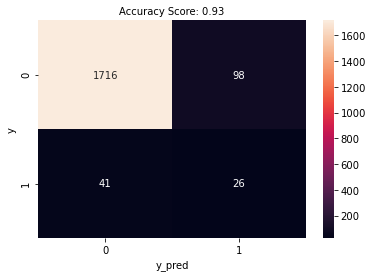

In [74]:
plot_confusion_matrix(y_test, y_pred_dtc)

In [77]:
#Le decision tree fait du overfitting, et ne donne pas des résultats concluants 

# 3ème itération, StandardScale + MinMax +Smote + Bagging(RandomForestClassifier)

In [79]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', RandomForestClassifier()]])

pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict (X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train) )
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test) )
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 1.000
Accuracy cross-validation: 0.954
Accuracy test: 0.956
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.98      1814
     class 1       0.41      0.55      0.47        67

    accuracy                           0.96      1881
   macro avg       0.70      0.76      0.72      1881
weighted avg       0.96      0.96      0.96      1881



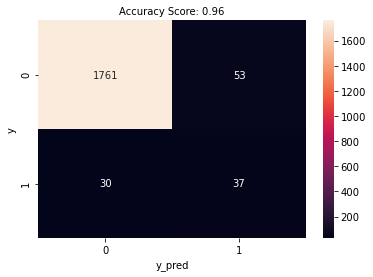

In [80]:
plot_confusion_matrix(y_test, y_pred_rfc)

In [ ]:
#Le random Forest donne des résultats moyens

# 4ème itération, StandardScale + MinMax +Smote + Boosting(GradientBoostingClassifier)

In [85]:
pipeline_gbc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', GradientBoostingClassifier()]])

pipeline_gbc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_gbc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_gbc = pipeline_gbc.predict (X_test)
print ( 'Accuracy train: %.3f' %pipeline_gbc.score (X_train, y_train) )
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_gbc.score (X_test, y_test) )
print(classification_report(y_test, y_pred_gbc, target_names=target_names))

Accuracy train: 0.964
Accuracy cross-validation: 0.937
Accuracy test: 0.931
              precision    recall  f1-score   support

     class 0       0.99      0.94      0.96      1814
     class 1       0.29      0.66      0.40        67

    accuracy                           0.93      1881
   macro avg       0.64      0.80      0.68      1881
weighted avg       0.96      0.93      0.94      1881



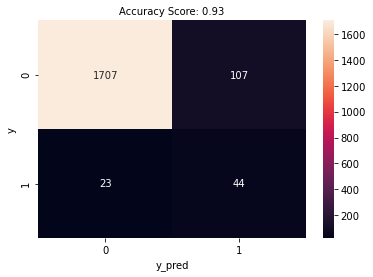

In [86]:
plot_confusion_matrix(y_test, y_pred_gbc)

In [ ]:
#Il me semble que le meilleur modèle qui donne un recall interessant et sans trop pénaliser la précision
# RandomForestClassifier et le GradientBoostingClassifier

# Processing Scaling, selon la distribution des features

In [20]:
from distfit import distfit
#Recherche des différentes distributions 
#Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks')

,distr,score,LLE,loc,scale,arg
0,t,0.038582,NaN,0.5044,0.040083,"(3.2796358709356817,)"
1,dweibull,0.322892,NaN,0.503059,0.042611,"(1.02410803255099,)"
2,norm,1.828622,NaN,0.50518,0.060681,()
3,gamma,1.828622,NaN,-0.423964,0.00425,"(218.85197997336843,)"
4,lognorm,1.828622,NaN,-15.456981,15.962179,"(0.003812045338724035,)"
5,beta,2.250696,NaN,-0.451552,1.803358,"(113.03461849698613, 99.86340554921878)"
6,loggamma,2.250696,NaN,-3.363571,0.76343,"(159.2912615983601,)"
7,genextreme,4.401871,NaN,-0.095263,0.671238,"(0.6128500033845028,)"
8,expon,5.801256,NaN,0.0,0.50518,()
9,pareto,5.801256,NaN,-380797923.164389,380797923.164389,"(714074898.5257258,)"


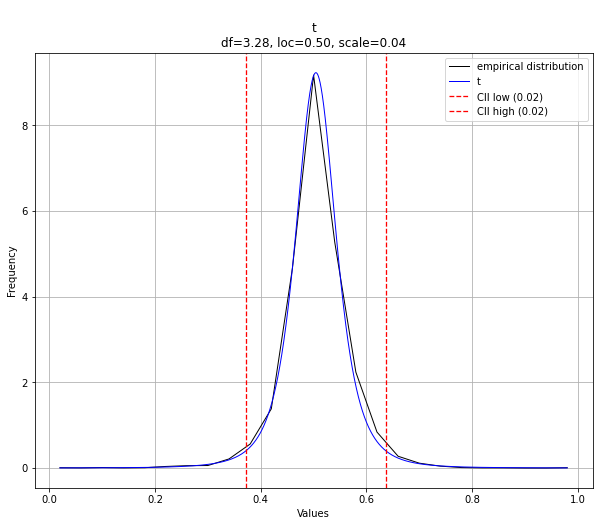

In [106]:
# Fit test sur une feature 
dist1.fit_transform(df["ROA(C) before interest and depreciation before interest"],verbose=1)
dist1.plot(verbose=1)
dist1.summary

In [71]:
X = X_train.copy()

In [72]:
#Boucle pour itérations 
# Fit
from distfit import distfit
norm_dis =[]
t_dis =[]
log_dis = []
autre_dis = []

distfit = distfit(bins=25,alpha=0.02,stats='ks')

for col in X.columns:
    distfit.fit_transform(X[col], verbose=1)
    if distfit.model["name"] == "t":
        t_dis.append([col, distfit.model["score"]])
    elif distfit.model["name"] == "norm":
         norm_dis.append([col, distfit.model["score"]])
    elif distfit.model["name"] == "lognorm":
         log_dis.append([col, distfit.model["score"]])
    else:   
        #autre_dis.append([col, distfit.model["score"], distfit.model["name"]])
        autre_dis.append([col, distfit.model["score"]])

t_dis = pd.DataFrame(t_dis, columns=["feature", "score"])
norm_dis = pd.DataFrame(norm_dis, columns=["feature", "score"])
log_dis = pd.DataFrame(log_dis, columns=["feature", "score"])
autre_dis = pd.DataFrame(autre_dis, columns=["feature", "score"])

In [ ]:
#Obtient donc une liste de features
# - Distribution normale = Standardscale
# - Distribution en t = RobusteScale 
# - Distribution log = fonction log
# - Autres = MinMaxScale 

In [171]:
autre_dis

,feature,score
0,Operating Gross Margin,5.450909e-01
1,Realized Sales Gross Margin,8.075434e-01
2,Operating Profit Rate,1.108472e+00
3,Pre-tax net Interest Rate,5.450909e-01
4,After-tax net Interest Rate,1.108472e+00
5,Non-industry income and expenditure/revenue,8.075434e-01
6,Continuous interest rate (after tax),3.228919e-01
7,Operating Expense Rate,1.448411e+00
8,Research and development expense rate,8.075434e-01
9,Interest-bearing debt interest rate,2.716536e+00


In [73]:
def log_transform(x):
    return np.log(x + 1)
transformer = FunctionTransformer(log_transform)

In [30]:
t_dis.shape

(7, 2)

In [25]:
norm_dis.shape

(21, 2)

In [26]:
log_dis.shape

(5, 2)

In [27]:
autre_dis.shape

(57, 2)

In [29]:
df.shape

(6819, 94)

In [74]:
#Dataframe
t_dis = pd.DataFrame(t_dis, columns=["feature", "score"])
norm_dis = pd.DataFrame(norm_dis, columns=["feature", "score"])
log_dis = pd.DataFrame(log_dis, columns=["feature", "score"])
autre_dis = pd.DataFrame(autre_dis, columns=["feature", "score"])

#Récupération des noms de colonnes en list
other_dist_list = list(autre_dis['feature'])
norm_dist_list = list(norm_dis['feature'])
t_dist_list = list(t_dis['feature'])
lognorm_dist_list = list(log_dis['feature'])

In [30]:
list(autre_dis['feature'])

['Operating Gross Margin',
 'Realized Sales Gross Margin',
 'Pre-tax net Interest Rate',
 'After-tax net Interest Rate',
 'Non-industry income and expenditure/revenue',
 'Continuous interest rate (after tax)',
 'Operating Expense Rate',
 'Research and development expense rate',
 'Cash flow rate',
 'Interest-bearing debt interest rate',
 'Tax rate (A)',
 'Realized Sales Gross Profit Growth Rate',
 'Operating Profit Growth Rate',
 'Continuous Net Profit Growth Rate',
 'Total Asset Growth Rate',
 'Net Value Growth Rate',
 'Total Asset Return Growth Rate Ratio',
 'Cash Reinvestment %',
 'Current Ratio',
 'Interest Expense Ratio',
 'Total debt/Total net worth',
 'Long-term fund suitability ratio (A)',
 'Borrowing dependency',
 'Contingent liabilities/Net worth',
 'Inventory and accounts receivable/Net value',
 'Total Asset Turnover',
 'Average Collection Days',
 'Inventory Turnover Rate (times)',
 'Fixed Assets Turnover Frequency',
 'Quick Assets/Total Assets',
 'Current Assets/Total Assets

In [31]:
X_train.shape

(4389, 93)

In [40]:
list(t_dis['feature'])

['ROA(C) before interest and depreciation before interest',
 'ROA(A) before interest and % after tax',
 'ROA(B) before interest and depreciation after tax',
 'Net Value Per Share (B)',
 'Net Value Per Share (A)',
 'Net Value Per Share (C)',
 'Cash Flow Per Share',
 'Revenue per person',
 'Operating profit per person',
 'CFO to Assets']

In [41]:
list(log_dis['feature'])

['Revenue Per Share (Yuan ¥)',
 'Quick Ratio',
 'Accounts Receivable Turnover',
 'Allocation rate per person',
 'Quick Assets/Current Liability']

In [44]:
# other_dist_lis = X_train[['Operating Gross Margin',
#  'Realized Sales Gross Margin',
#  'Pre-tax net Interest Rate',
#  'After-tax net Interest Rate',
#  'Non-industry income and expenditure/revenue',
#  'Continuous interest rate (after tax)',
#  'Operating Expense Rate',
#  'Research and development expense rate',
#  'Cash flow rate',
#  'Interest-bearing debt interest rate',
#  'Tax rate (A)',
#  'Realized Sales Gross Profit Growth Rate',
#  'Operating Profit Growth Rate',
#  'Continuous Net Profit Growth Rate',
#  'Total Asset Growth Rate',
#  'Net Value Growth Rate',
#  'Total Asset Return Growth Rate Ratio',
#  'Cash Reinvestment %',
#  'Current Ratio',
#  'Interest Expense Ratio',
#  'Total debt/Total net worth',
#  'Long-term fund suitability ratio (A)',
#  'Borrowing dependency',
#  'Contingent liabilities/Net worth',
#  'Inventory and accounts receivable/Net value',
#  'Total Asset Turnover',
#  'Average Collection Days',
#  'Inventory Turnover Rate (times)',
#  'Fixed Assets Turnover Frequency',
#  'Quick Assets/Total Assets',
#  'Current Assets/Total Assets',
#  'Cash/Total Assets',
#  'Current Liability to Assets',
#  'Operating Funds to Liability',
#  'Inventory/Current Liability',
#  'Current Liabilities/Equity',
#  'Long-term Liability to Current Assets',
#  'Total income/Total expense',
#  'Total expense/Assets',
#  'Current Asset Turnover Rate',
#  'Quick Asset Turnover Rate',
#  'Working capitcal Turnover Rate',
#  'Cash Turnover Rate',
#  'Cash Flow to Sales',
#  'Fixed Assets to Assets',
#  'Current Liability to Equity',
#  'Equity to Long-term Liability',
#  'Cash Flow to Total Assets',
#  'Cash Flow to Liability',
#  'Cash Flow to Equity',
#  'Total assets to GNP price',
#  'No-credit Interval',
#  'Gross Profit to Sales',
#  'Liability to Equity',
#  'Degree of Financial Leverage (DFL)',
#  'Interest Coverage Ratio (Interest expense to EBIT)',
#  'Equity to Liability']]

# norm_dist_list = X_train[['Operating Profit Rate',
#  'Persistent EPS in the Last Four Seasons',
#  'Operating Profit Per Share (Yuan ¥)',
#  'Per Share Net profit before tax (Yuan ¥)',
#  'After-tax Net Profit Growth Rate',
#  'Regular Net Profit Growth Rate',
#  'Debt ratio %',
#  'Net worth/Assets',
#  'Operating profit/Paid-in capital',
#  'Net profit before tax/Paid-in capital',
#  'Net Worth Turnover Rate (times)',
#  'Working Capital to Total Assets',
#  'Cash/Current Liability',
#  'Inventory/Working Capital',
#  'Current Liabilities/Liability',
#  'Working Capital/Equity',
#  'Retained Earnings to Total Assets',
#  'Current Liability to Liability',
#  'Current Liability to Current Assets',
#  'Net Income to Total Assets',
#  "Net Income to Stockholder's Equity"]]

# t_dist_list = X_train[['ROA(C) before interest and depreciation before interest',
#  'ROA(A) before interest and % after tax',
#  'ROA(B) before interest and depreciation after tax',
#  'Net Value Per Share (B)',
#  'Net Value Per Share (A)',
#  'Net Value Per Share (C)',
#  'Cash Flow Per Share',
#  'Revenue per person',
#  'Operating profit per person',
#  'CFO to Assets']]
    
# lognorm_dist_list= X_train[['Revenue Per Share (Yuan ¥)',
#  'Quick Ratio',
#  'Accounts Receivable Turnover',
#  'Allocation rate per person',
#  'Quick Assets/Current Liability']]

In [ ]:
# other_dist = X_train[['Operating Gross Margin',
#  'Realized Sales Gross Margin',
#  'Pre-tax net Interest Rate',
#  'After-tax net Interest Rate',
#  'Non-industry income and expenditure/revenue',
#  'Continuous interest rate (after tax)',
#  'Operating Expense Rate',
#  'Research and development expense rate',
#  'Cash flow rate',
#  'Interest-bearing debt interest rate',
#  'Tax rate (A)',
#  'Realized Sales Gross Profit Growth Rate',
#  'Operating Profit Growth Rate',
#  'Continuous Net Profit Growth Rate',
#  'Total Asset Growth Rate',
#  'Net Value Growth Rate',
#  'Total Asset Return Growth Rate Ratio',
#  'Cash Reinvestment %',
#  'Current Ratio',
#  'Interest Expense Ratio',
#  'Total debt/Total net worth',
#  'Long-term fund suitability ratio (A)',
#  'Borrowing dependency',
#  'Contingent liabilities/Net worth',
#  'Inventory and accounts receivable/Net value',
#  'Total Asset Turnover',
#  'Average Collection Days',
#  'Inventory Turnover Rate (times)',
#  'Fixed Assets Turnover Frequency',
#  'Quick Assets/Total Assets',
#  'Current Assets/Total Assets',
#  'Cash/Total Assets',
#  'Current Liability to Assets',
#  'Operating Funds to Liability',
#  'Inventory/Current Liability',
#  'Current Liabilities/Equity',
#  'Long-term Liability to Current Assets',
#  'Total income/Total expense',
#  'Total expense/Assets',
#  'Current Asset Turnover Rate',
#  'Quick Asset Turnover Rate',
#  'Working capitcal Turnover Rate',
#  'Cash Turnover Rate',
#  'Cash Flow to Sales',
#  'Fixed Assets to Assets',
#  'Current Liability to Equity',
#  'Equity to Long-term Liability',
#  'Cash Flow to Total Assets',
#  'Cash Flow to Liability',
#  'Cash Flow to Equity',
#  'Total assets to GNP price',
#  'No-credit Interval',
#  'Gross Profit to Sales',
#  'Liability to Equity',
#  'Degree of Financial Leverage (DFL)',
#  'Interest Coverage Ratio (Interest expense to EBIT)',
#  'Equity to Liability']]

# norm_dist = X_train[['Operating Profit Rate',
#  'Persistent EPS in the Last Four Seasons',
#  'Operating Profit Per Share (Yuan ¥)',
#  'Per Share Net profit before tax (Yuan ¥)',
#  'After-tax Net Profit Growth Rate',
#  'Regular Net Profit Growth Rate',
#  'Debt ratio %',
#  'Net worth/Assets',
#  'Operating profit/Paid-in capital',
#  'Net profit before tax/Paid-in capital',
#  'Net Worth Turnover Rate (times)',
#  'Working Capital to Total Assets',
#  'Cash/Current Liability',
#  'Inventory/Working Capital',
#  'Current Liabilities/Liability',
#  'Working Capital/Equity',
#  'Retained Earnings to Total Assets',
#  'Current Liability to Liability',
#  'Current Liability to Current Assets',
#  'Net Income to Total Assets',
#  "Net Income to Stockholder's Equity"]]

# t_dist = X_train[['ROA(C) before interest and depreciation before interest',
#  'ROA(A) before interest and % after tax',
#  'ROA(B) before interest and depreciation after tax',
#  'Net Value Per Share (B)',
#  'Net Value Per Share (A)',
#  'Net Value Per Share (C)',
#  'Cash Flow Per Share',
#  'Revenue per person',
#  'Operating profit per person',
#  'CFO to Assets']]
    
# lognorm_dist = X_train[['Revenue Per Share (Yuan ¥)',
#  'Quick Ratio',
#  'Accounts Receivable Turnover',
#  'Allocation rate per person',
#  'Quick Assets/Current Liability']]

# norm_d = Pipeline(steps=[
#     ('norm', StandardScaler())
#         ])
# t_d  = Pipeline(steps=[
#    ('t',RobustScaler())])

# log_d = Pipeline(steps=[
#     ('transformer', transformer)])

# autre_d = Pipeline(steps=[
#     ('autre', MinMaxScaler())])

# preprocessing = ColumnTransformer([
#         ('norm', norm_d, norm_dist.columns),
#         ('t_d ', t_d , t_dist.columns),
#         ('log', log_d, lognorm_dist.columns),
#         ('autre', autre_d, other_dist.columns)   
#     ]
# )

In [75]:
other_dist_list = list(autre_dis['feature'])
norm_dist_list = list(norm_dis['feature'])
t_dist_list = list(t_dis['feature'])
lognorm_dist_list = list(log_dis['feature'])

norm_d = Pipeline(steps=[
    ('norm', StandardScaler())
        ])
t_d  = Pipeline(steps=[
   ('t',RobustScaler())])

log_d = Pipeline(steps=[
    ('transformer', transformer)])

autre_d = Pipeline(steps=[
    ('autre', MinMaxScaler())])

preprocessing = ColumnTransformer([
        ('norm', norm_d, norm_dist_list),
        ('t_d ', t_d , t_dist_list),
        ('log', log_d, lognorm_dist_list),
        ('autre', autre_d, other_dist_list)   
    ]
)

In [77]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', RandomForestClassifier()]])

pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict (X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train) )
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test) )
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 1.000
Accuracy cross-validation: 0.956
Accuracy test: 0.954
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.98      1814
     class 1       0.39      0.48      0.43        67

    accuracy                           0.95      1881
   macro avg       0.68      0.72      0.70      1881
weighted avg       0.96      0.95      0.96      1881



In [33]:
pipeline_gbc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(sampling_strategy='minority')],
                                    ['classifier', GradientBoostingClassifier()]])

pipeline_gbc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_gbc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_gbc = pipeline_gbc.predict (X_test)
print ( 'Accuracy train: %.3f' %pipeline_gbc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_gbc.score (X_test, y_test) )
print(classification_report(y_test, y_pred_gbc, target_names=target_names))

Accuracy train: 0.971
Accuracy cross-validation: 0.941
Accuracy test: 0.932
              precision    recall  f1-score   support

     class 0       0.98      0.94      0.96      1814
     class 1       0.29      0.60      0.39        67

    accuracy                           0.93      1881
   macro avg       0.64      0.77      0.68      1881
weighted avg       0.96      0.93      0.94      1881



In [108]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', RandomForestClassifier(criterion='entropy', random_state=1)]])


pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 1.000
Accuracy cross-validation: 0.955
Accuracy test: 0.957
              precision    recall  f1-score   support

     class 0       0.98      0.97      0.98      1814
     class 1       0.43      0.58      0.49        67

    accuracy                           0.96      1881
   macro avg       0.71      0.78      0.74      1881
weighted avg       0.96      0.96      0.96      1881



In [128]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', LogisticRegression()]])


pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 0.882
Accuracy cross-validation: 0.880
Accuracy test: 0.873
              precision    recall  f1-score   support

     class 0       0.99      0.88      0.93      1814
     class 1       0.19      0.78      0.30        67

    accuracy                           0.87      1881
   macro avg       0.59      0.83      0.62      1881
weighted avg       0.96      0.87      0.91      1881



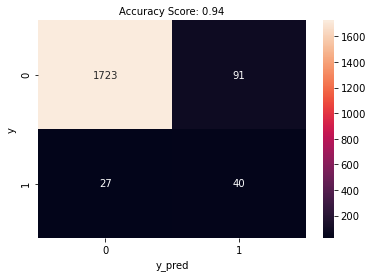

In [110]:
plot_confusion_matrix(y_test, y_pred_gbc)

In [ ]:
#Random Forest qui est un modèle de bagging peut être amélioré grace à une feature selection et du tunnning 

# Stacking

In [111]:
from sklearn.ensemble import StackingClassifier

In [ ]:
model_1 = SGDClassifier(random_state=0)
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = KNeighborsClassifier(n_neighbors=2)

In [ ]:
model = StackingClassifier([('SGD', model_1),
                            ('Tree', model_2),
                            ('KNN', model_3)],
                             final_estimator=KNeighborsClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [113]:
model_1 = LogisticRegression()
model_2 = DecisionTreeClassifier(random_state=0)
model_3 = RandomForestClassifier()


pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', StackingClassifier([('SGD', model_1),
                                                                    ('Tree', model_2),
                                                                    ('KNN', model_3)],
                                                                     final_estimator=KNeighborsClassifier())
                                    
                                    ]])


pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 1.000
Accuracy cross-validation: 0.963
Accuracy test: 0.961
              precision    recall  f1-score   support

     class 0       0.97      0.99      0.98      1814
     class 1       0.42      0.25      0.32        67

    accuracy                           0.96      1881
   macro avg       0.70      0.62      0.65      1881
weighted avg       0.95      0.96      0.96      1881



In [ ]:
#Le stacking ne donne pas de bons résultats, 

# Bagging 2ème partie + BaggingClassifier

In [112]:
#Bagging 
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [115]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', BaggingClassifier(base_estimator=RandomForestClassifier())
                                                                #)
                                    
                                    
                                    ]])


pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 0.995
Accuracy cross-validation: 0.951
Accuracy test: 0.952
              precision    recall  f1-score   support

     class 0       0.99      0.96      0.97      1814
     class 1       0.39      0.61      0.47        67

    accuracy                           0.95      1881
   macro avg       0.69      0.79      0.72      1881
weighted avg       0.96      0.95      0.96      1881



# Boosting +  AdaBoostClassifier

In [ ]:
#Boosting AdaBoostClassifier(n_estimators=100)

In [117]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [122]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', AdaBoostClassifier()]])


pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 0.937
Accuracy cross-validation: 0.925
Accuracy test: 0.914
              precision    recall  f1-score   support

     class 0       0.98      0.93      0.95      1814
     class 1       0.23      0.61      0.34        67

    accuracy                           0.91      1881
   macro avg       0.61      0.77      0.65      1881
weighted avg       0.96      0.91      0.93      1881



In [ ]:
#LEarning curve 

In [137]:
train_sizes, train_scores, test_scores = learning_curve(estimator = pipeline_rfc,
                                          X = X,
                                          y = y,
                                          train_sizes = [5,10,50,100,200,300,400],
                                          cv = 5,
                                          scoring='recall',
                                          shuffle = True,
                                          random_state=3)

# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()


In [138]:
# Take the mean of cross-validated train scores and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

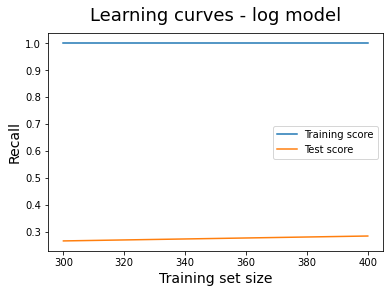

In [139]:
# Plot the learning curves!
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('Recall', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves - log model', fontsize = 18, y = 1.03)
plt.legend()
plt.show()

In [ ]:
#Random avec param n_estimators':[150],'class_weight':['balanced_subsample

In [136]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', RandomForestClassifier(class_weight='balanced_subsample')
                                                                          ]])


# pipeline_rfc.fit(X_train, y_train)
# scores = cross_val_score ( estimator=pipeline_rfc,
#                           X = X_train,
#                           y = y_train,
#                           cv=5,
#                           n_jobs = 2)
# y_pred_rfc = pipeline_rfc.predict(X_test)
# print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
# print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
# print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
# print(classification_report(y_test, y_pred_rfc, target_names=target_names))

# Feature Selection 

In [59]:
df_features = new_df.copy()

In [60]:
corr = df_features.corr()

In [61]:
# another way to visualize it
df_features.corr().style.background_gradient(cmap='coolwarm')

In [62]:
# Unstack correlation matrix 
corr_df = corr.unstack().reset_index() 
corr_df

# rename columns
corr_df.columns = ['feature_1','feature_2', 'correlation'] 

# sort by correlation
corr_df.sort_values(by="correlation",ascending=False, inplace=True) 

# Remove self correlation
corr_df = corr_df[corr_df['feature_1'] != corr_df['feature_2']] 
corr_df

,feature_1,feature_2,correlation
7302,Current Liability to Liability,Current Liabilities/Liability,1.000000
7398,Current Liability to Equity,Current Liabilities/Equity,1.000000
6093,Current Liabilities/Liability,Current Liability to Liability,1.000000
6282,Current Liabilities/Equity,Current Liability to Equity,1.000000
8276,Gross Profit to Sales,Operating Gross Margin,1.000000
...,...,...,...
5678,Current Liability to Assets,Net worth/Assets,-0.814160
3571,Debt ratio %,Equity to Liability,-0.879501
8779,Equity to Liability,Debt ratio %,-0.879501
3516,Debt ratio %,Net worth/Assets,-1.000000


In [63]:
features_corr_df = corr_df[corr_df['feature_1'] == 'Bankrupt?']
features_corr_df

,feature_1,feature_2,correlation
37,Bankrupt?,Debt ratio %,0.260814
36,Bankrupt?,Total debt/Total net worth,0.229542
60,Bankrupt?,Current Liability to Assets,0.192470
40,Bankrupt?,Borrowing dependency,0.173991
84,Bankrupt?,Current Liability to Current Assets,0.168098
...,...,...,...
38,Bankrupt?,Net worth/Assets,-0.260814
1,Bankrupt?,ROA(C) before interest and depreciation before...,-0.273792
3,Bankrupt?,ROA(B) before interest and depreciation after tax,-0.286875
2,Bankrupt?,ROA(A) before interest and % after tax,-0.299326


In [126]:
#Afficher l'ensemble des row dans le .describe()
pd.set_option('display.max_row', None)

In [127]:
features_corr_df.T

,37,36,60,40,84,90,78,66,70,79,...,54,23,43,68,19,38,1,3,2,85
feature_1,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,...,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?,Bankrupt?
feature_2,Debt ratio %,Total debt/Total net worth,Current Liability to Assets,Borrowing dependency,Current Liability to Current Assets,Liability to Equity,Current Liability to Equity,Current Liabilities/Equity,Total expense/Assets,Equity to Long-term Liability,...,Working Capital to Total Assets,Per Share Net profit before tax (Yuan ¥),Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Persistent EPS in the Last Four Seasons,Net worth/Assets,ROA(C) before interest and depreciation before...,ROA(B) before interest and depreciation after tax,ROA(A) before interest and % after tax,Net Income to Total Assets
correlation,0.260814,0.229542,0.19247,0.173991,0.168098,0.163835,0.15081,0.15081,0.145423,0.136793,...,-0.197934,-0.210276,-0.21834,-0.227754,-0.229174,-0.260814,-0.273792,-0.286875,-0.299326,-0.33084


In [65]:
df_selection = features_corr_df[0:20]

,feature_1,feature_2,correlation
37,Bankrupt?,Debt ratio %,0.260814
36,Bankrupt?,Total debt/Total net worth,0.229542
60,Bankrupt?,Current Liability to Assets,0.192470
40,Bankrupt?,Borrowing dependency,0.173991
84,Bankrupt?,Current Liability to Current Assets,0.168098


In [67]:
df_selection["feature_2"].unique()

array(['Debt ratio %', 'Total debt/Total net worth',
       'Current Liability to Assets', 'Borrowing dependency',
       'Current Liability to Current Assets', 'Liability to Equity',
       'Current Liability to Equity', 'Current Liabilities/Equity',
       'Total expense/Assets', 'Equity to Long-term Liability',
       'Fixed Assets Turnover Frequency', 'Cash/Current Liability',
       'Contingent liabilities/Net worth',
       'Inventory and accounts receivable/Net value',
       'Fixed Assets to Assets', 'Net Value Growth Rate',
       'Total assets to GNP price', 'Revenue per person', 'Quick Ratio',
       'Long-term fund suitability ratio (A)'], dtype=object)

In [71]:
df_select = df_model.copy()

In [72]:
df_select = df_select[['Debt ratio %', 'Total debt/Total net worth',
       'Current Liability to Assets', 'Borrowing dependency',
       'Current Liability to Current Assets', 'Liability to Equity',
       'Current Liability to Equity', 'Current Liabilities/Equity',
       'Total expense/Assets', 'Equity to Long-term Liability',
       'Fixed Assets Turnover Frequency', 'Cash/Current Liability',
       'Contingent liabilities/Net worth',
       'Inventory and accounts receivable/Net value',
       'Fixed Assets to Assets', 'Net Value Growth Rate',
       'Total assets to GNP price', 'Revenue per person', 'Quick Ratio',
       'Long-term fund suitability ratio (A)', 'Bankrupt?']]

In [73]:
#On définit les features et la Target
X = df_select.drop(['Bankrupt?'], axis = 1)
y = df_select['Bankrupt?']
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

In [ ]:
# norm_dist = X_train[['Operating Profit Rate',
#  'Persistent EPS in the Last Four Seasons',
#  'Operating Profit Per Share (Yuan ¥)',
#  'Per Share Net profit before tax (Yuan ¥)',
#  'After-tax Net Profit Growth Rate',
#  'Regular Net Profit Growth Rate',
#  'Debt ratio %',
#  'Net worth/Assets',
#  'Operating profit/Paid-in capital',
#  'Net profit before tax/Paid-in capital',
#  'Net Worth Turnover Rate (times)',
#  'Working Capital to Total Assets',
#  'Cash/Current Liability',
#  'Inventory/Working Capital',
#  'Current Liabilities/Liability',
#  'Working Capital/Equity',
#  'Retained Earnings to Total Assets',
#  'Current Liability to Liability',
#  'Current Liability to Current Assets',
#  'Net Income to Total Assets',
#  "Net Income to Stockholder's Equity"]]


# df_select[['Debt ratio %', 'Total debt/Total net worth',
#        'Current Liability to Assets', 'Borrowing dependency',
#        'Current Liability to Current Assets', 'Liability to Equity',
#        'Current Liability to Equity', 'Current Liabilities/Equity',
#        'Total expense/Assets', 'Equity to Long-term Liability',
#        'Fixed Assets Turnover Frequency', 'Cash/Current Liability',
#        'Contingent liabilities/Net worth',
#        'Inventory and accounts receivable/Net value',
#        'Fixed Assets to Assets', 'Net Value Growth Rate',
#        'Total assets to GNP price', 'Revenue per person', 'Quick Ratio',
#        'Long-term fund suitability ratio (A)', 'Bankrupt?']]


In [74]:
normal_dis = X_train[['Debt ratio %', "Current Liability to Current Assets", 'Cash/Current Liability']]
autre_dis = X_train.drop(['Debt ratio %', "Current Liability to Current Assets", 'Cash/Current Liability'], axis = 1)


norm_trans = Pipeline(steps=[
    ('normal', StandardScaler()),
])
pas_norm_trans = Pipeline(steps=[
   ('Minmax',MinMaxScaler())])


preprocessing = ColumnTransformer([
        ('autre', pas_norm_trans, autre_dis.columns),
        ('normal', norm_trans, normal_dis.columns)
    ]
)

In [77]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', RandomForestClassifier()]])


pipeline_rfc.fit(X_train, y_train)
scores = cross_val_score ( estimator=pipeline_rfc,
                          X = X_train,
                          y = y_train,
                          cv=5,
                          n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 1.000
Accuracy cross-validation: 0.942
Accuracy test: 0.942
              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      1814
     class 1       0.27      0.37      0.31        67

    accuracy                           0.94      1881
   macro avg       0.62      0.67      0.64      1881
weighted avg       0.95      0.94      0.95      1881



In [76]:
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97      1814
     class 1       0.28      0.39      0.33        67

    accuracy                           0.94      1881
   macro avg       0.63      0.68      0.65      1881
weighted avg       0.95      0.94      0.95      1881



In [188]:
correlated_features = len(corr_df[(corr_df['correlation'] >= 0.9) | (corr_df['correlation'] <= -0.9)])

correlated_features

58

In [ ]:
# compute VIF factor for feature index 0
vif(diabetes_df.values, 0)

In [ ]:
# compute the VIF factor to all the features 
# store results in a dataframe
vif_df = pd.DataFrame()
vif_df["vif_index"] = [vif(diabetes_df.values, i) for i in range(diabetes_df.shape[1])]
vif_df["features"] = diabetes_df.columns
vif_df

In [ ]:
Features Seectionnée

# Modèle Tunning 

In [145]:
other_dist_list = list(autre_dis['feature'])
norm_dist_list = list(norm_dis['feature'])
t_dist_list = list(t_dis['feature'])
lognorm_dist_list = list(log_dis['feature'])

norm_d = Pipeline(steps=[
    ('norm', StandardScaler())
        ])
t_d  = Pipeline(steps=[
   ('t',RobustScaler())])

log_d = Pipeline(steps=[
    ('transformer', transformer)])

autre_d = Pipeline(steps=[
    ('autre', MinMaxScaler())])

preprocessing = ColumnTransformer([
        ('norm', norm_d, norm_dist_list),
        ('t_d ', t_d , t_dist_list),
        ('log', log_d, lognorm_dist_list),
        ('autre', autre_d, other_dist_list)   
    ]
)

In [146]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', AdaBoostClassifier()]])


pipeline_rfc.fit(X_train, y_train)
# scores = cross_val_score ( estimator=pipeline_rfc,
#                           X = X_train,
#                           y = y_train,
#                           cv=5,
#                           n_jobs = 2)
y_pred_rfc = pipeline_rfc.predict(X_test)
print ( 'Accuracy train: %.3f' %pipeline_rfc.score (X_train, y_train))
print ( 'Accuracy cross-validation: %.3f' %scores.mean() )
print ( 'Accuracy test: %.3f' %pipeline_rfc.score (X_test, y_test))
print(classification_report(y_test, y_pred_rfc, target_names=target_names))

Accuracy train: 0.937
Accuracy cross-validation: 0.881
Accuracy test: 0.914
              precision    recall  f1-score   support

     class 0       0.98      0.93      0.95      1814
     class 1       0.23      0.61      0.34        67

    accuracy                           0.91      1881
   macro avg       0.61      0.77      0.65      1881
weighted avg       0.96      0.91      0.93      1881



In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV

In [78]:
# estimator.get_params()

In [35]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', RandomForestClassifier()]])

classifier = RandomForestClassifier()

param_grid = [{#"classifier__criterion" : ["gini", "entropy"],
              #"classifier__splitter" :  ["best", "random"],
             "classifier__n_estimators": [20, 30, 40, 50,60, 70],
             "classifier__max_depth" : [1, 2, 3, 4, 5]
             }]

search = GridSearchCV(pipeline_rfc, param_grid, scoring='recall',n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.814):
{'classifier__max_depth': 1, 'classifier__n_estimators': 50}


In [162]:
pipeline_rfc = imbpipeline(steps = [['preprocess', preprocessing],
                                    ['SMOTE', SMOTE(random_state=42)],
                                    ['classifier', RandomForestClassifier()]])

classifier = RandomForestClassifier()

param_grid = [{#"classifier__criterion" : ["gini", "entropy"],
              #"classifier__splitter" :  ["best", "random"],
              "classifier__n_estimators": [20, 30, 40, 50,60, 70],
             "classifier__max_depth" : [1, 2, 3, 4, 5]
             }]

search = GridSearchCV(pipeline_rfc, param_grid, scoring='recall',n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.827):
{'classifier__max_depth': 1, 'classifier__n_estimators': 50}


In [38]:
model = search.best_estimator_
y_pred = model.predict(X_test)

In [39]:
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      0.81      0.89      1814
     class 1       0.15      0.90      0.25        67

    accuracy                           0.81      1881
   macro avg       0.57      0.85      0.57      1881
weighted avg       0.97      0.81      0.87      1881



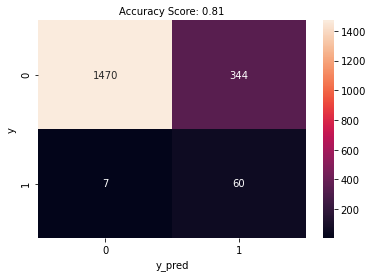

In [79]:
plot_confusion_matrix(y_test, y_pred)

# Mise en place de Pickles 

In [44]:
import pickle

In [45]:
with open("rfc_pickle.pkl", "wb") as file:
    pickle.dump(pipeline_rfc, file)